In [22]:
from abjad import *
%load_ext abjad.ext.ipython
import random

The abjad.ext.ipython extension is already loaded. To reload it, use:
  %reload_ext abjad.ext.ipython


# Construct a 2D array of Integer Ratios

In [41]:
size = 9
n_measures = 64
ratios = [[[i,j] for j in range(1,size+1)] for i in range(1,size+1)]

In [42]:
for row in ratios:
    print(str(row))
    print('')

[[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9]]

[[2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9]]

[[3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9]]

[[4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9]]

[[5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9]]

[[6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [6, 9]]

[[7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [7, 9]]

[[8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8], [8, 9]]

[[9, 1], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 9]]



# Define a function that performs a random walk over the ratio-matrix

In [43]:
def stumble(matrix_size, last):
    step = (0,0)
    while step == (0,0):
        y_step = random.choice([-1,0,1])
        if last[0] + y_step < 1 or last[0] + y_step >= size:
            y_step *= -1
        x_step = random.choice([-1,0,1])
        if last[1] + x_step < 1 or last[1] + x_step >= size:
            x_step *= -1
        step = (y_step, x_step)
    return [last[0] + step[0], last[1] + step[1]]

# Do the walk

In [44]:
last = [0,8]
walk = [ratios[last[1]][last[0]]]
indices = [last]
for i in range(n_measures):
    current = stumble(size, last)
    ratio = ratios[current[1]][current[0]]
    walk.append(ratio)
    last = current
walk = tuple(walk)
print(walk)

([9, 1], [8, 2], [7, 2], [7, 3], [8, 3], [7, 3], [6, 3], [7, 3], [8, 2], [9, 3], [8, 3], [9, 2], [8, 2], [8, 3], [9, 4], [8, 3], [9, 2], [8, 3], [7, 4], [7, 3], [7, 4], [7, 3], [7, 2], [7, 3], [8, 2], [8, 3], [9, 3], [8, 4], [7, 4], [8, 3], [7, 3], [8, 2], [7, 3], [8, 2], [8, 3], [7, 3], [7, 4], [7, 3], [8, 4], [7, 5], [8, 6], [9, 6], [8, 7], [8, 6], [7, 7], [8, 8], [8, 7], [9, 7], [8, 6], [9, 6], [8, 7], [7, 7], [8, 6], [8, 7], [9, 6], [8, 7], [7, 8], [8, 7], [7, 6], [6, 6], [7, 7], [6, 8], [5, 7], [4, 8], [4, 7])


# Interpretation 1: as ratio between two timespans

In [73]:
def repitch_both_parts(expr):
    for logical_tie in iterate(expr).by_logical_tie():
        transposition = random.randint(1,12)
        for component in logical_tie:
            mutate(component).transpose(transposition)
def repitch_second_part(expr):
    second_part = list(iterate(expr).by_logical_tie())[-1]
    for component in second_part:
        mutate(component).transpose(random.randint(1,12))
ts = (2,8)
staff = Staff()
for ratio in walk:
    tuplet = Tuplet.from_duration_and_ratio(ts, ratio)
    repitch_both_parts(tuplet)
    markup = Markup(str(ratio[0])+':'+str(ratio[1]))
    attach(markup, tuplet[0])
    measure = Measure(ts,[tuplet])
    staff.append(measure)
first = inspect_(staff).get_leaf(0)
attach(Tempo(Duration(1,4), 100), first)

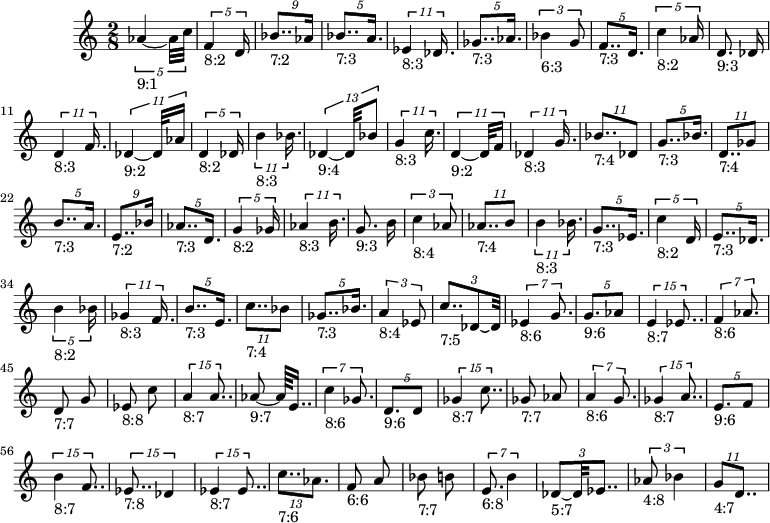

In [74]:
show(staff)

In [75]:
play(staff)

<audio controls type="audio/mpeg" src="data:audio/mpeg;base64,SUQzBAAAAAAAI1RTU0UAAAAPAAADTGF2ZjU2LjQwLjEwMQAAAAAAAAAAAAAA//tQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASW5mbwAAAA8AAAm6AA/iHgADBQgKDQ8SFBcaHB8hJCYpKy4xMzY4Oz1AQkVISk1PUlRXWVxfYWRmaWtucHN2eHt9gIKFh4qNj5KUl5mcnqGkpqmrrrCztbi7vsDCxcfKzM/S1dfZ3N7h4+bp7O7w8/X4+v0AAAAATGF2YzU2LjYwAAAAAAAAAAAAAAAAJAAAAAAAAAAP4h5Wn9DWAAAAAAAAAAAAAAAAAAAAAP/7kGQAAAOIJT+FZwAANoN4AKYwABAM91W5h4ARBpQp6xawAjOKCBG6oB1rp6GAEgYFRTcgN5g0BkBkZXOmOuuRw3L/gNHsAjMpUDxAA63Oay9cSZxAkTa2/d7OvDb/v/G6zWEx1jxeYllWG599FTrri9yWWM86j/w/T5/nnnqntvLg+sHwfB8/icHy4fid4P8u/84UBuW7HBg5tiQBMD5PfnpxgzP38YODBxsSDByjBgTERLAAAIWITs/X3u5SZmadrAY4IfBAEHAg4klFpxJxtKSWPbbYAACAETHiHEQSq5ejO2pN4+SdyC7rw+josAQrSpBy7gUHg/YS0b49QgDwnQoFYcZ/tLJGepZD7Ih2yo+O8ctGgUa2wyjpQxbXHw54iMERSxY0qH9u3Blk3uZvj2ibIC4LzlneojiuI317a+9//6+fL/v7+vB2KNDrfV2/J5gAAABKbRfBlbKsnis5XL1LZn7d1Cp+5M7qe6ecZL6cBhYd5C2+P3Pr3lkvJZHj4ZzUROQjwwZVw+JFAADmAT9FgsXyEQIBAUOPFAmPxv/7kmQJjsQGRMufcoAAN0P5g+w0ABBsrx4M92LAzg+liZWd2D0OAkQjQGLfAZ8gIEwzDYNCZMyiYTDLiPg2YAGAChQioyxAAwaBjyIqKJLlgM6FoIgQYyPgYEEREkmKopMAoUQhIkwfEQFHYvG5wvEijmhEyIpJZQP5DTheT+XkUWpF41f3T+/0vzn1r/Rb7H+sAMUAC5O0s3ExNbZn9fSKTKEUu3TRxWmGTiJiExIcmpnB6Oc1mJ07k22olXfW3rfpoGzbZDz2FSRsNGFsz/0MKy8P8z1MiRWMQhdMAwSR+MABENVgFT2T2EI0ZU4nocjjO8UCgYCmbhBxwCj8oY/QIGCBkdF0o23YZOhYxZr9NTmNJrFpfLZUKBJqARIkxZiXDogJL9qauxZW9Wnu7j6lUDiuXLmC2qTekytNKda///m9m99/GOntOR19oEYBcnZyMs9B7DLYaitM+KMdm7DL7In6au4domajqkXmsxLlTlKI19A3O1GPZ+hR9df2UAIRwCwLwIAqBwH5gCA5mhoawaaDxnVMGcAOYMChlnvhMAT/+5JkEQ5EnTXGi9yhcDHjiUhl6lQQ7LEaD3dlAMIM5WWYnRoAEwBBwLGB0b0g4YfC5BWIxkEgGSmVgOPAYtCsgwaADVBLVoi2x8AhdAjME6eLoakAbyFbEXLg6wHHgNctE/jFY0AeGCq8njyJZCEmIa84KkHEiczMxOHhyhiJwyCTIuAaR/WYEPs9RAEvUtvU/zLSe1WAAAAFtjbxqqvUd8cDuC5/jAxQV9rhjAfS1ebAOA5jlLAJcoMx3qHt8qK3qKPKPjPhlL4wkQYyIAYwNAGRkOYyS0dzAkPDCgTQMKg6EZhrIploIqSxf8wIAAwFAU3HD4wVAVHdBIXnM49TaQNSKWV0RDJxIKNA0Oz0QAIgTVm8KBopjq3GabOMCMEIsN8neq0CdZFZZ0X1SQRaf/3YgjIxa7vLGhfL8lzZvAv7v/+bzc13/kV7S/5/KoGADAEyringhmIImksPNdZoE8JMmgmcBUlxJOK8DHaJgQbKRf1CBNDAY/h2eyXt/RUKAAmAOEwVgAGCOAsYKQcZiirdGHYpiRQhwiDARmDGZmmI//uSZBEPFFYrxYPd0WA4xJlcZWdyEeizEg37gsDJjOVxl5yowgITAsDKuAIPpskgBEKiyggQVimKwjBzNlvUzoNESg0GRXMuxkJjZYLuyqzZlRzNTHr1tngjQmXQQI5k/ZFT4/Chud+0IAJWHvd48pKSaZU73b0wn9JozDKlfa//qvJ9z/2z0LZvbo54AGDgACGAGpbE7sGGVPDCq0ZFhCEyGHeZlXpgcPEl132DHxFPQ4XPsAGRygiCe+UGOiN6/QtoTK6REKGtTJg5gITkwAQzDUYbrMGAAMKgQoMgkCEw5h0wEwmwwHAYVCIWVx1S+mHgIFAIBjuNC8xFrDQIkUpkTTDBYXNfHNOibmoqOrcOaMh+eZCaJGKBKRUUPAgBjztam4tqcHSuEMZy92r5bgmFdn6zfInFAQgCtvUpt86qtS1U4qL/+47P1//ToT26+3V3fkhAMAAQAXw01VyZ452k6doNoJwCaFBXMg7wbyfjzPULAq2eE3iAXPxjocDfKENGnD2AdCptjBDBQKAGzAcAWMAUFM1n0QjGcUTAwOQUI//7kmQNDxRfL0WD3dlQM4RJEGjtghBQsRQPd2UA0YzksJ00cBgWDRk02BxeEAYLI0ASBIwjBs4rBwIIMKgGygwGAgw7QI2wOTDchlYECRt+JgKK00yFZkxABoN8gEBYKr72q5IGGBALnwrGaKqSGGUbv9mhwQSCx/7YjD1Q1KmOo5lv35xlLQr3/+4Vzf/qXc3//u9/08iuLIn0O8hbdpCkImzYmOQfyX1SKpKqTcpKoUBaZEJW4fCSfiVNqJo9kGyIzdbep/O0ISQACmCcCqmmgDMAAFo3aDHyhFDE0GB0JBGHhiJzhqGKQWAloYJAgwALc18TQwGAOFFCKHHJtbeE0JEDObCwoRHDJiuYtLGZlTDGj+pnm2A2U2iGesE7hJrxi1WSFhXL8btdmiqOUmP/FREOr/m8efGr34surcb69//Qxj+f/wTzR3/UAAhAQACoNIgq1sbZMuhtFtmhVAosy66s9nhZeKbk86pEUm1ELxcNPElfUdDw/Kl7dmZl+moAAAGBTILgqEwHQMALCwCxvVg6AJLjAkFQgSjAkGjEXqD/+5JkEI4UYilFG93ZUDLjORFrCjiRtK8QD3dlQMMNJKyctHDPYRgCAKCQLgWYOEwbMI+YJAoWkJhaC4KmALCmiDK0nxcAwMNMSZW5UMw0swiVNrAX8p+vWaMss3pK8cR3AQ9IJzCsMJIYuSa19QVCkmO/yLr9JgeJ1dbg2z/HFzm4Vz//kV6yGdj/9f6/+sEPlMtrr5OsAWJBVJbKsZDSUMQR3PpnvtzksQ4BsbqH3hKExtAmJxGAqu5kZO+TyGzd9UpEgWzAWAxMDMCQCA9nLgXYZaB0YVhMFw5BgIGbdQHbgiAIN1aEKTEMKjxUPwUVYBA0ZAQwHAExYZ89UNDgx73rDg07VQSjs2XLMQRyNq+vNtwM1lFqW+UzdQM8RKBbtoCIZNoPZTcxXEUDNrlC14YIkmpmvltsPf9q83HX7sf/3Jf+XP+0+od9PPft/6CwAMAAGgHNpwUfsrnQibmiUlGtWCGWdOCEeQm5Z4lsQH1Em+tyM3E39Qr65Ubd9rqqBQBg8DWqqYFAIpgihlHIC0eZ8lQYhAgEBCYSBeaDuCe3//uSZBCPVH8ow4Pd4SA0ozkmGy0cEPyjEg93ZUDCEuSkbRxwCaZZBBgQCgEKGDoCdA5xgoHoRBChL4GoHEcpAQ0KWPNcEYWNkAoeAr9RV9wAFBLXPZJ55noMX7LbnImQAQx8DZFB9yfAAXHnzOasxEVCY8AbXNuQIxUgZDFN347P/7NLNdz6L/+u6y3IM5r6+d/akAg4As0sBSk7MnRjsWmUOpEXO6usiIB7mEnzl4eH2GbrIpBbUBNH1CzEus84fy

# Interpretation 2: polyrhythms

In [79]:
staff1 = Staff()
staff2 = Staff()
pitch1 = 4
pitch2 = 0
def change_all_pitches(expr, pitch):
    for leaf in iterate(expr).by_class(Note):
        mutate(leaf).transpose(pitch)
for ratio in walk:
    n1 = [1]*ratio[0]
    n2 = [1]*ratio[1]
    duration = Duration(2, 4)
    tuplet1 = Tuplet.from_duration_and_ratio(duration, n1)
    tuplet2 = Tuplet.from_duration_and_ratio(duration, n2)
    change_all_pitches(tuplet1, pitch1)
    change_all_pitches(tuplet2, pitch2)
    markup = Markup(str(ratio[0])+':'+str(ratio[1]))
    attach(markup, tuplet1[0])
    measure1 = Measure(duration,[tuplet1])
    measure2 = Measure(duration,[tuplet2])
    staff1.append(measure1)
    staff2.append(measure2)
score = Score([staff1,staff2])

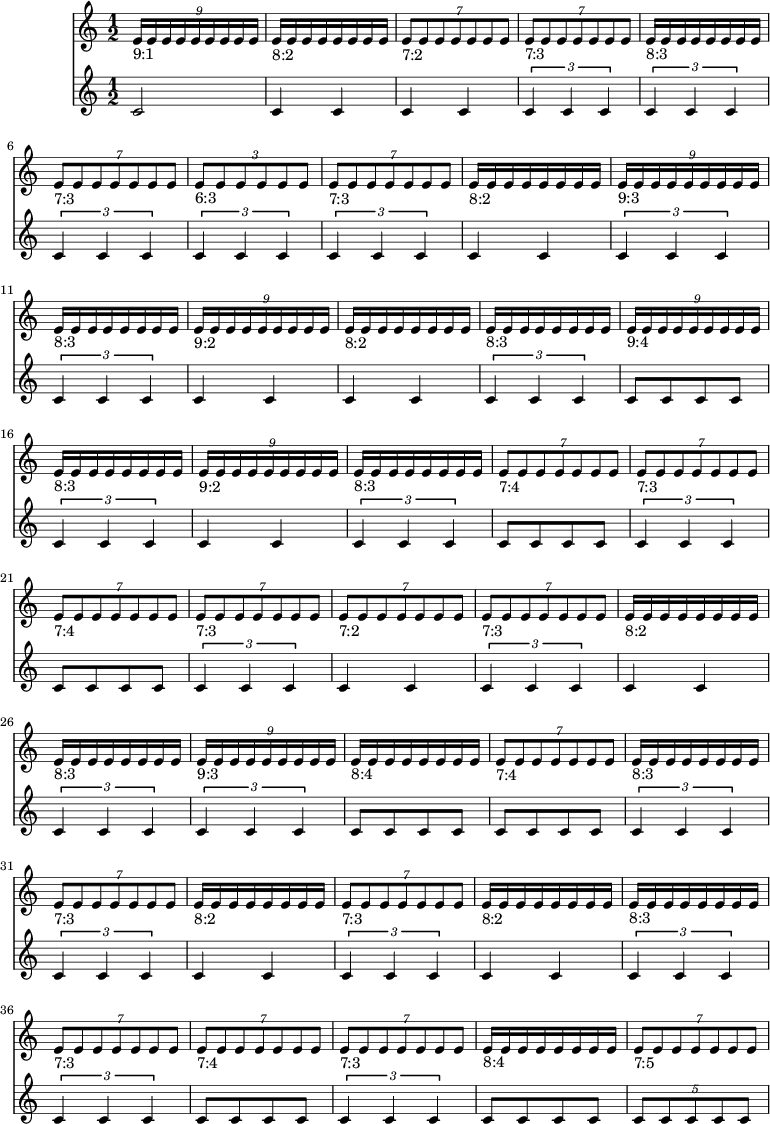

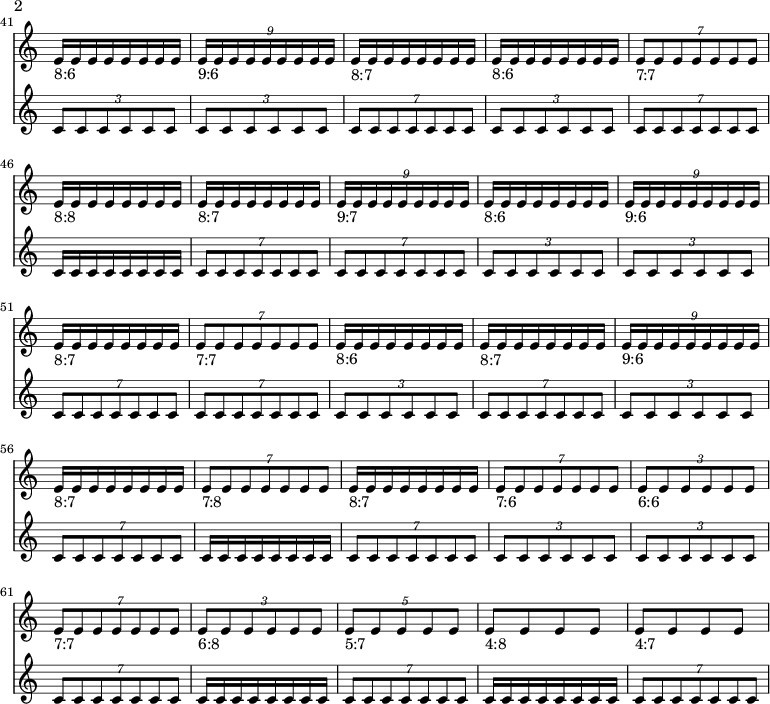

In [80]:
show(score)

In [81]:
load_sound_font('/Users/josephdavancens/Music/Soundfonts/GeneralUserGSFluidSynthv1.44.sf2', 'gm')
play(score)

<audio controls type="audio/mpeg" src="data:audio/mpeg;base64,SUQzBAAAAAAAI1RTU0UAAAAPAAADTGF2ZjU2LjQwLjEwMQAAAAAAAAAAAAAA//tQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASW5mbwAAAA8AABNyAB/AKAADBQgKDQ8SFBcaHB8hJCYpKy4xMzY4Oz1AQkVISk1PUlRXWVxfYWRmaWtucHN2eHt9gIKFh4qNkJKUl5mcnqGkp6mrrrCztbi7vsDDxcfKzM/S1dfa3N7h4+bp7O7x8/b4+v0AAAAATGF2YzU2LjYwAAAAAAAAAAAAAAAAJAAAAAAAAAAfwCgRoFP6AAAAAAAAAAAAAAAAAAAAAP/7kGQAAAN8Lj+FYwAAOQQX0KewAFDM+UtZh4AY6BCoNxCAAn/jdPDbK0v0i3OLqG15tOgPeJBIWkQAOYnOZCGQCGkVVvLhlt1Y14GMYGGveAF2NcnM9U/aSkuw25cjcBAOmHA8ohy9K5+ILva/PzEMP5DlivGIxY5//+dJY5nT09vuFPT5/+eeeq9s+UlDn1HCgYvvEB48eSnOJoQhUN6Hoeo2eP0zq87M3iQAGB9WkEgSCYs1YscpM7M3vNKUppmDQRHE5LJ5m/i9ePAUUQa5aVbtttAAAgNxx0LiDiQcKgYOoaOANoE+4KdRiJecuWkI8JQOk/hdTeLA7eAZScmOMpFoxGQKKx/MnlRBeIVhicMLhUMivUzO9cVcn6qhjcVOq50MXCbxOtNt0dLCs8ZJ67d1fxmVaYnLLEzsrA2v/bV/il5r9tk33u3HFLRPiGvT1AAAIAAACkNLNOAAAAAS5IxQruWY4qffAmt8YY9b2PO13UwUDxHvlO/lxThJr36hncFgeCRYesp1ETQAAJ0Bo5UASgWOIPz3g4s6IGcz0f/7kmQKDuQnPcyfboAANMOpUew0AI/9Ey5t5E3Ayg5lCYSKEEEogtKY+DJhgg3MZaDEwQwMIcYm2w9UZsBYCAguGrgy2C18AEIKKCIOO0mgtMDxOPxXEGFg0G0DdBxrFMxKorxIopjmrJkaojxkSADKl1FSA11O0yOKyq+ZL6LzI1Wgo1rZfYwfUjtfVWoy9R+pG+vUCFyNTDKR6cdW2r9f8PsogZUzQe1XqeU3HIFzDOw+AsxMXKFRQHY88bLTIeopv/ned7Pb/LJ4CdMFBAUFn+rh48+YkQGjEJvo8ZYfGMCpmQQvcAFpuaILKEPDM4MyZsnoQvBTZX5A+cJSqCfZUNZPLQc0zqjrEIbQJDcWoOi1lHnPj8hUXk0epne7E5QRA2rrX2113O47G92/Eh2rNh/EiFDFqzzH+FHwXMjerON1JxTdX8G6rANZ5q/BzIiwRnrbuM2mbsuhO7hpPP3SUWTzk2FeEdNpHy/5E/iSSEAmdfwrYhkv3f/pAQAAIYshiEEAcUD2bhpsHD0YYMEZlicYpiGYLCEZEC6JAAFA1NH/+5JkEw7UuTrIi7tTcDHi2VJhhmYRNNsmTmmrwMcLpQGHodDUrMNAPdoAJ5tTSoOt0x0zNLBwUIBRROeDgYXCSuYcfBgM7ppBKVhVSSiFHZPXdww8DMRKqcsBRQDEoCvUta39dqyOOUOioMg7lIwABp8xq/BOC3o19B4nj15oFxbCaNOWGqkRe83O9D37dl02Kruo9YIYBqtVL4ESXcU1gNxneidqumbzBrD48iCcJKRHHG41Ryfnfs2pIidJSVyfkyFGGP/rLAdFhlIKmIQac/iZ/ZoGMg4YNvBgoFGGwgIgMZ/A48EioWPDlA69ZgVbnRVFqGmGULmSvl80VD7BRwMHdxJkmxFgdeZ3qbBh8eHxOMigAyheoncUB1H3tHBFaSwM81qYWCIhdU2DeCENpWsFZKJMM5KETKjNtA11IIrUf/b1Gb5xtR5KfSLW4a9epIugvWTPdhN5oEy977T9CRE5t6R4jPUngyEomB00Ys024LWBV2qNycMoiC+sJBhejfUADgHRgZpEhi0knEuMa8xZgYTGOY8a+ACOZgITgEqL//uSZA+OREk4SROaO+AzoqlBLekOEajjIC7o75DBE6Zo8RZQ3AByNdyIweDF9hAcObEQaFMtMbINJ4JiYgWGGFl+wOWMBPZPARuBKgm5U4pQmgt9BABNaQk6bRWHWy6iZ7Udv65nvhEyI1ZmSwRXDlzDJYLtqkyPJlpQCvFR+UQuslb39T+7aEC2Re5tNYQSDwGEB4E+WQZQ/SXmkTjqcdyoyYAPkp51eh4lGgbOGA/lSv8sS5byVyYHF4NUw4YWd6kIzAkATBgbjIuFzzspiI3jFcjzUIMzAsRCYCTNAEAIAxgEVBr6JAcjhgKAoIMAwWOcAhx5mY3CdEoPSDCnhe+Qmxb0aZUPBvOGmDjN6YWMNDpmAAUOCQrVlDiZUh+2YUJy+AFbmX9gocAp1WaJ1VuZ8kmai/x+zocCF4+Ij5z5Q8lV0WuZ7FuY2UNXKZEAMAD0ADwkKGmHL10aJ1vDvovxIvhge6drO1zwm5BlyvghtXaOr+1PVv/7gUdjB3qVAhOseKUwNB0zrQY5Ic4xiFExbi0zmFkLgiYJh4YqiqKgsf/7kmQRD0R5MceLulRQMuSpYkXlLpEUxx4O6O+Awgrl2PeMuoAlMaLteBAxQSCwpnF4lEwqgEAg4cSUt0JYhQn7CELEFWjQwB5AvM6A8FP4elIyfIj8rgArIHPCwe8BWbQ9h0CEGbXFKWUbj6Ro0IrRUEm0RLnMry0K8tl2iwkPF4K3yvRS0rl52voWctyn2xAAUAMXS2BVBVuOclLSqTHvBBuzYKslDqKpAxoS7RzY8Y/3z40E4rht/NSfYrU/rqLLN+uDBIYjAkCDhYXzn5yw4RTBaXTJ8TTDAJTA0FzMUKiIAyA7ASCw0oYIAIGlqZDG0o0GPTc4DmegVGFIIgHA2CYIYAeKYsAnXAAotL+ihsWltHgwwYk3hyQ05QuVllwFELghuAnh4p3RDxm1mBArTKL5LZdetHsfJEyyjgbfE784YyytbT5Dcp+ghAAOALxiKIAlBoOIUrWtPGDKwaO8r4rsXFhY1htNRMPHn7KfQO+7dHv2PL/V16ex9CoADAXyEB2WnOjTiPtxrMjQFMljfAWDhwuGDABmVAOAAByBHjL/+5JkEg4UZDPHk7qD0DEkmXI8Q5iTAMcYLu2xQLsTaHTziW/lrDAYHgSA5gwAxrAQpQbGBJVtnRsBjgQLwfQC0MPEm2TBxaHTtDw4pYlRaQmvN3YWOCDVrYszMoVKdy4VOw7KXRcbcAqNMtozYA1FEPVpiwlV1zUxRlggHOoa1I1Nano+cR5m5RqeWSAPANs0cAKEhYDhIeeDKs+Mhk+F8NJk0/Hy/YkCuAQ2O9RLbCaurtXr7f+gOnBOco9yFkDw5lAUHth0mk1ZGBYEmU06G94OGRQ0CMVDKIq0IDApmjZ0tQM7oCB8GEEZqiqJA4YMgMYzCUYIpCIQcKFBzQCYgHhniZ/GESQ25v4MChWKvEIloaXmex8wQbMIYK44AkyGm2248QItOwxIaAfkyJw8H/RgQrdWTfhaSqtPXRZJqdI+Hk9kgUc6kR5ypOXs27HEqKl2oMwAOgAhFONo4eoUF26Mheg45VTgUzBVY8o67CzE5ZLj1dOwVNeKboW+cG7qI4Q3tQAMBzzDIDjCkOjd1Cz05EzGwKjBuTjAQRjFsETB//uSZA6ORCgzx5O6a2A6hNmNPYVyEQTHHC7qcRDViqUJjKTgsCjL0CQEBRIgA6w5hmDaRgqmAFp/3QOCmPJYK2YUYBDFTMFmDM20wbYLCN5bggQrmdWJGEFgo1pFUyglYZeIzD8SqC1n5PpJ1CrJwJOdPTixBWPH/lY73yptaz9W89t2UbvmdRaZJCAAB0AAABfgAeGpA5xiQRPogPBNDKitahh3IwI628fDui8ZtBpMHLjR2OZhra0TXxEn/MpnGn